In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_test[0].shape

(28, 28)

In [4]:
X_test = X_test / 255
X_train = X_train / 255

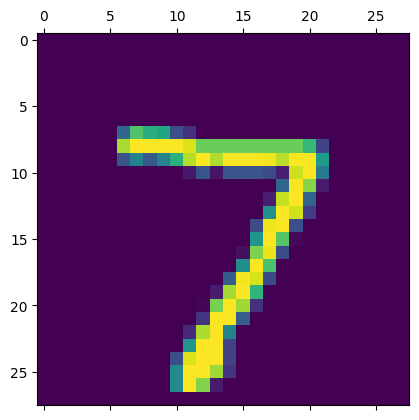

In [5]:
plt.matshow(X_test[0])

In [6]:
y_test[0]

7

In [7]:
#Convert 28x28 to a 1D array

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [8]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
#Simple Neural Network
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.8133 - loss: 0.7258
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9133 - loss: 0.3077
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - accuracy: 0.9212 - loss: 0.2825
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 860us/step - accuracy: 0.9241 - loss: 0.2719
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.9257 - loss: 0.2636


In [10]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.9170 - loss: 0.2985


[0.2646562457084656, 0.9269000291824341]

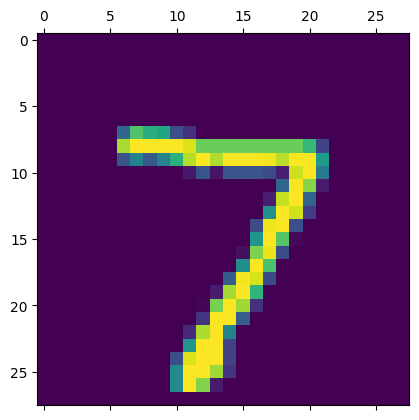

In [11]:
plt.matshow(X_test[0])

In [12]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step


array([1.92803238e-02, 2.66129859e-07, 5.99439740e-02, 9.51499701e-01,
       3.22687998e-03, 1.05832852e-01, 1.56509839e-06, 9.99773026e-01,
       1.01584926e-01, 6.46021247e-01], dtype=float32)

In [13]:
np.argmax(y_predicted[0])

7

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [15]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    0,    2,    0,    8,   13,    2,    3,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    9,  922,   17,    8,    3,   14,   10,   43,    3],
       [   2,    0,   20,  921,    1,   23,    2,   10,   25,    6],
       [   1,    1,    2,    1,  925,    0,   13,    3,   11,   25],
       [   7,    3,    2,   34,   10,  775,   15,    5,   34,    7],
       [   7,    3,    4,    1,    7,   11,  920,    2,    3,    0],
       [   1,    5,   23,    5,    9,    0,    0,  948,    5,   32],
       [   5,    6,    6,   15,    9,   21,    9,   11,  886,    6],
       [   9,    7,    1,    9,   33,    7,    1,   23,    9,  910]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

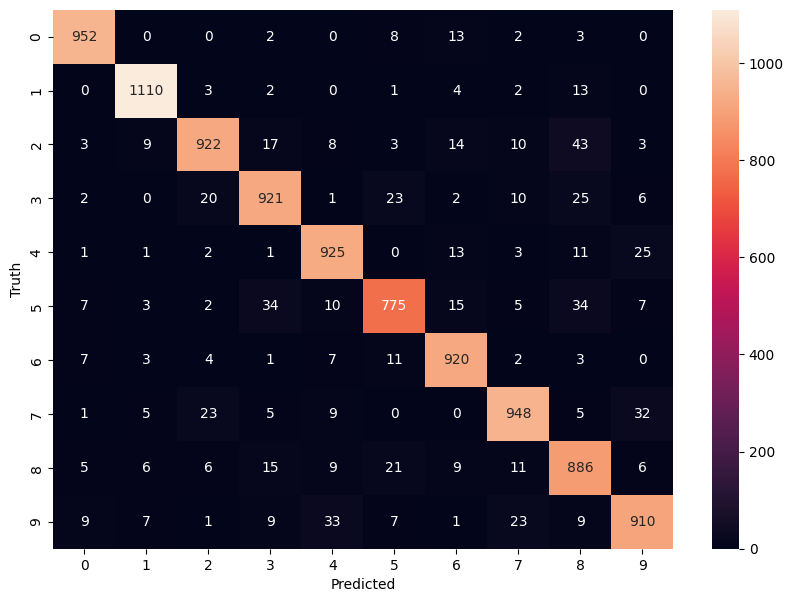

In [16]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(10, input_shape=(100,), activation='sigmoid'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8307 - loss: 0.7051
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9400 - loss: 0.2124
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9562 - loss: 0.1533
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9668 - loss: 0.1189
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9738 - loss: 0.0934


In [18]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.9650 - loss: 0.1140


[0.10295397788286209, 0.9689000248908997]

Text(95.72222222222221, 0.5, 'Truth')

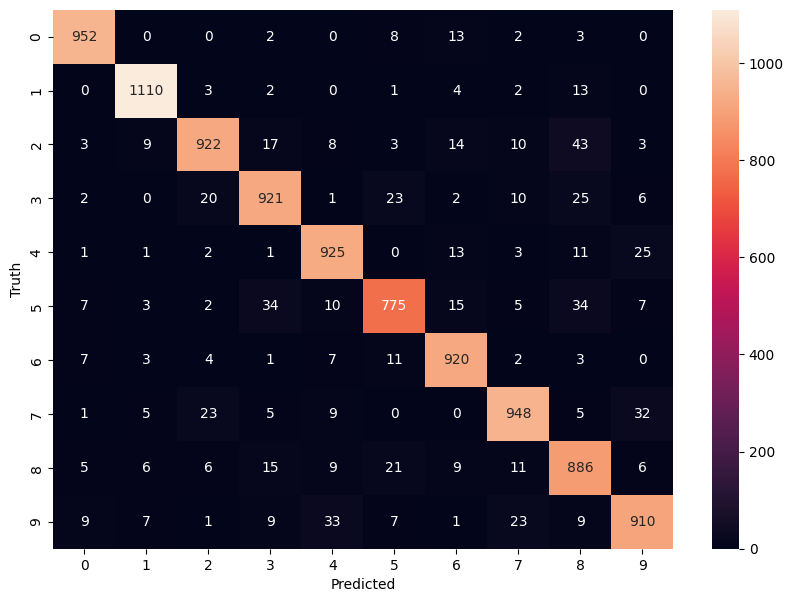

In [19]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8746 - loss: 0.4458
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9610 - loss: 0.1325
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9741 - loss: 0.0869
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9819 - loss: 0.0623
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9856 - loss: 0.0480


In [23]:
#USING CNN
cnn = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(28, 28, 1), filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9012 - loss: 0.3227
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9858 - loss: 0.0485
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9900 - loss: 0.0336
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9921 - loss: 0.0240
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9948 - loss: 0.0165


In [25]:
cnn.evaluate(X_test, y_test) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9880 - loss: 0.0377


[0.030332813039422035, 0.9900000095367432]

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = cnn.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.97      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

